In [1]:
!git clone https://github.com/mdrmz/f-AnoGAN.git

Cloning into 'f-AnoGAN'...
remote: Enumerating objects: 368, done.
remote: Counting objects: 100% (368/368), done.
remote: Compressing objects: 100% (221/221), done.
remote: Total 368 (delta 146), reused 360 (delta 143), pack-reused 0
Receiving objects: 100% (368/368), 3.45 MiB | 32.44 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [2]:
%cd f-AnoGAN
!python setup.py install

/content/f-AnoGAN
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other

In [3]:
%cd /content/f-AnoGAN/your_own_dataset

/content/f-AnoGAN/your_own_dataset


In [5]:
!python train_wgangp.py  '/content/f-AnoGAN/your_own_dataset/dataset/dataset/train/'

[Epoch   0/300] [Batch 0/3] [D loss: 9.306015] [G loss: 0.009420]
[Epoch   1/300] [Batch 0/3] [D loss: 9.178196] [G loss: 0.010215]
[Epoch   2/300] [Batch 0/3] [D loss: 9.049455] [G loss: 0.009395]
[Epoch   3/300] [Batch 0/3] [D loss: 8.963935] [G loss: 0.008416]
[Epoch   4/300] [Batch 0/3] [D loss: 8.757715] [G loss: 0.006541]
[Epoch   5/300] [Batch 0/3] [D loss: 8.543014] [G loss: 0.002639]
[Epoch   6/300] [Batch 0/3] [D loss: 8.325309] [G loss: 0.002906]
[Epoch   7/300] [Batch 0/3] [D loss: 8.068542] [G loss: -0.001200]
[Epoch   8/300] [Batch 0/3] [D loss: 7.761197] [G loss: -0.001316]
[Epoch   9/300] [Batch 0/3] [D loss: 7.328041] [G loss: -0.007000]
[Epoch  10/300] [Batch 0/3] [D loss: 6.830942] [G loss: -0.018104]
[Epoch  11/300] [Batch 0/3] [D loss: 6.226669] [G loss: -0.034635]
[Epoch  12/300] [Batch 0/3] [D loss: 5.682924] [G loss: -0.045789]
[Epoch  13/300] [Batch 0/3] [D loss: 4.944021] [G loss: -0.076318]
[Epoch  14/300] [Batch 0/3] [D loss: 4.028628] [G loss: -0.101163]
[E

In [6]:
!python train_encoder_izif.py '/content/f-AnoGAN/your_own_dataset/dataset/dataset/train/'

[Epoch   0/200] [Batch 0/3] [E loss: 0.558326]
[Epoch   1/200] [Batch 0/3] [E loss: 0.547305]
[Epoch   2/200] [Batch 0/3] [E loss: 0.385212]
[Epoch   3/200] [Batch 0/3] [E loss: 0.414834]
[Epoch   4/200] [Batch 0/3] [E loss: 0.390680]
[Epoch   5/200] [Batch 0/3] [E loss: 0.385097]
[Epoch   6/200] [Batch 0/3] [E loss: 0.332197]
[Epoch   7/200] [Batch 0/3] [E loss: 0.363737]
[Epoch   8/200] [Batch 0/3] [E loss: 0.366351]
[Epoch   9/200] [Batch 0/3] [E loss: 0.289123]
[Epoch  10/200] [Batch 0/3] [E loss: 0.309903]
[Epoch  11/200] [Batch 0/3] [E loss: 0.269557]
[Epoch  12/200] [Batch 0/3] [E loss: 0.296666]
[Epoch  13/200] [Batch 0/3] [E loss: 0.249322]
[Epoch  14/200] [Batch 0/3] [E loss: 0.244976]
[Epoch  15/200] [Batch 0/3] [E loss: 0.257727]
[Epoch  16/200] [Batch 0/3] [E loss: 0.258772]
[Epoch  17/200] [Batch 0/3] [E loss: 0.267500]
[Epoch  18/200] [Batch 0/3] [E loss: 0.252265]
[Epoch  19/200] [Batch 0/3] [E loss: 0.258610]
[Epoch  20/200] [Batch 0/3] [E loss: 0.282602]
[Epoch  21/20

In [7]:
!python test_anomaly_detection.py '/content/f-AnoGAN/your_own_dataset/dataset/dataset/test/'

100% 12/12 [00:00<00:00, 47.52it/s]


In [8]:
!python save_compared_images.py '/content/f-AnoGAN/your_own_dataset/dataset/dataset/test/' --n_iters 0 --n_grid_lines 10

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [12]:
%pwd

'/content/f-AnoGAN/your_own_dataset'

In [10]:
df = pd.read_csv("results/score.csv")
df

,label,img_distance,anomaly_score,z_distance
0,0,0.169763,0.248407,0.002147
1,0,0.187405,0.224780,0.002660
2,0,0.163840,0.187196,0.002057
3,0,0.292982,0.535975,0.006931
4,0,0.234660,0.235125,0.001320
5,0,0.303851,0.340053,0.002540
6,0,0.180387,0.180585,0.000720
7,1,0.107532,0.107797,0.001016
8,1,0.114062,0.127666,0.001458
9,1,0.135171,0.141736,0.003643


In [13]:
trainig_label = 1
labels = np.where(df["label"].values == trainig_label, 0, 1)
anomaly_score = df["anomaly_score"].values
img_distance = df["img_distance"].values
z_distance = df["z_distance"].values

In [14]:
fpr, tpr, _ = roc_curve(labels, img_distance)
precision, recall, _ = precision_recall_curve(labels, img_distance)
roc_auc = auc(fpr, tpr)
pr_auc =  auc(recall, precision)

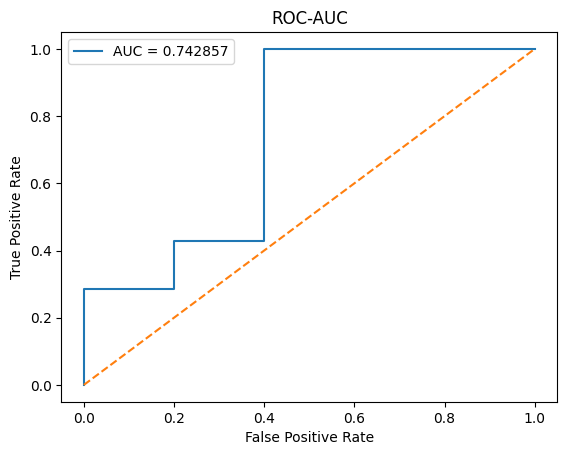

In [15]:
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC-AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

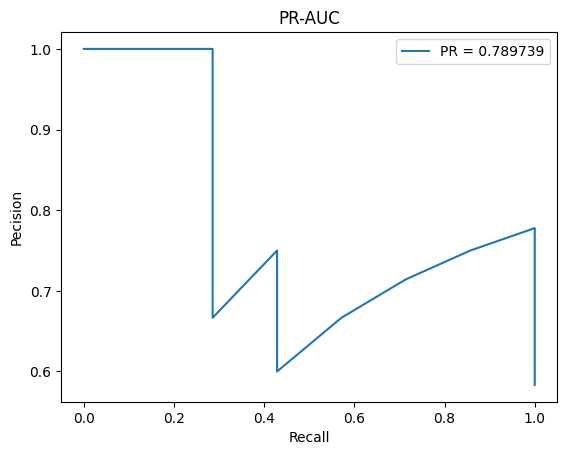

In [16]:
plt.plot(recall, precision, label=f"PR = {pr_auc:3f}")
plt.title("PR-AUC")
plt.xlabel("Recall")
plt.ylabel("Pecision")
plt.legend()
plt.show()

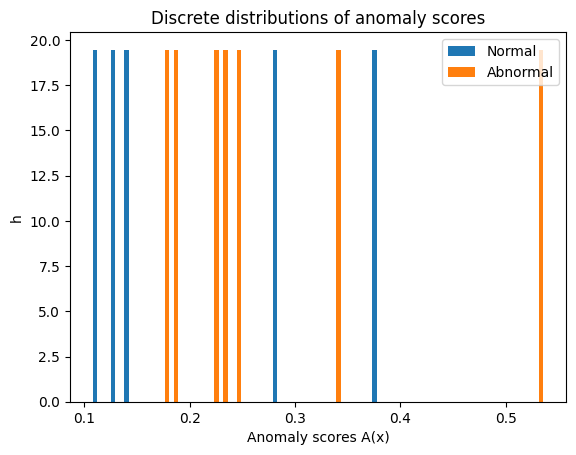

In [17]:
plt.hist([anomaly_score[labels == 0], anomaly_score[labels == 1]],
          bins=100, density=True, stacked=True,
          label=["Normal", "Abnormal"])
plt.title("Discrete distributions of anomaly scores")
plt.xlabel("Anomaly scores A(x)")
plt.ylabel("h")
plt.legend()
plt.show()

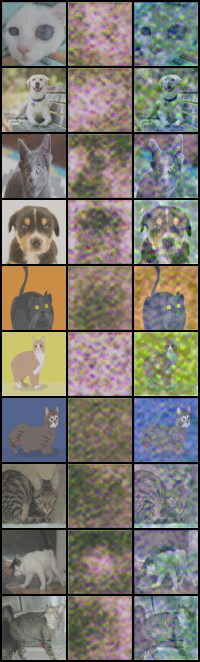

In [18]:
from PIL import Image

Image.open("results/images_diff/000010.png")